In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("google-womens-gymnastics-multiTimeline.csv")

In [3]:
df

,Month,womens gymnastics: (United States)
0,2004-01,2
1,2004-02,3
2,2004-03,2
3,2004-04,2
4,2004-05,1
...,...,...
232,2023-05,1
233,2023-06,<1
234,2023-07,1
235,2023-08,2


In [4]:
# Function to replace '<1' with 0 and convert to float
def replace_and_convert(x):
    if isinstance(x, str):
        if x.startswith('<'):
            return 0.0
        else:
            return float(x)
    else:
        return x

# Convert object columns (excluding 'Month') with values less than 1 to integers
obj_columns = df.select_dtypes(include=['object']).columns
obj_columns = obj_columns[obj_columns != 'Month']  # Exclude 'Month' column

for col in obj_columns:
    df[col] = df[col].apply(replace_and_convert).astype(int)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Month                               237 non-null    object
 1   womens gymnastics: (United States)  237 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [7]:
# Split 'Month' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Month'].str.split('-', expand=True)

# Convert 'Year' and 'Month' columns to integers if needed
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)


In [8]:
# Convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.columns

Index(['Month', 'womens gymnastics: (United States)', 'Year'], dtype='object')

In [12]:
desired_columns = ['Month',  'Year', 'womens gymnastics: (United States)']

# Create a new DataFrame with the specified column order
df_reordered = df[desired_columns]

In [13]:
df_reordered

,Month,Year,womens gymnastics: (United States)
0,1970-01-01 00:00:00.000000001,2004,2
1,1970-01-01 00:00:00.000000002,2004,3
2,1970-01-01 00:00:00.000000003,2004,2
3,1970-01-01 00:00:00.000000004,2004,2
4,1970-01-01 00:00:00.000000005,2004,1
...,...,...,...
232,1970-01-01 00:00:00.000000005,2023,1
233,1970-01-01 00:00:00.000000006,2023,0
234,1970-01-01 00:00:00.000000007,2023,1
235,1970-01-01 00:00:00.000000008,2023,2


In [14]:
import matplotlib.pyplot as plt

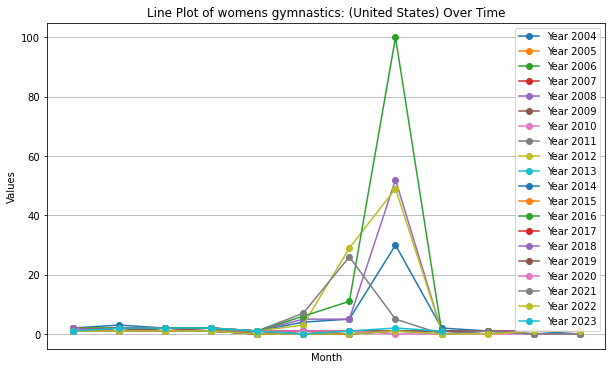

In [15]:
# Convert 'Month' column to a NumPy array
x = np.array(df['Month'])
y = np.array(df['womens gymnastics: (United States)'])

# Get unique years in the DataFrame
unique_years = df['Year'].unique()

# Create a line plot with different colors for each year
plt.figure(figsize=(10, 6))
for year in unique_years:
    mask = df['Year'] == year
    plt.plot(x[mask], y[mask], label=f'Year {year}', marker='o')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Line Plot of womens gymnastics: (United States) Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [17]:
df_reordered['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

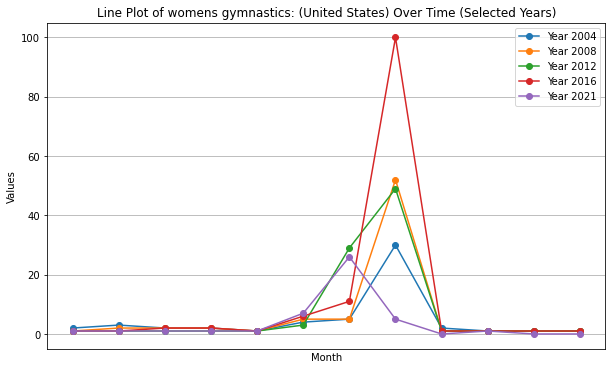

In [18]:
# Filter the DataFrame to include only specific years
years_to_plot = [2004, 2008, 2012, 2016, 2021]
filtered_df = df[df['Year'].isin(years_to_plot)]

# Create a line plot with different colors for each year
plt.figure(figsize=(10, 6))
for year in years_to_plot:
    mask = filtered_df['Year'] == year
    x = filtered_df.loc[mask, 'Month'].values  # Convert to NumPy array
    y = filtered_df.loc[mask, 'womens gymnastics: (United States)'].values  # Convert to NumPy array
    plt.plot(x, y, label=f'Year {year}', marker='o')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Line Plot of womens gymnastics: (United States) Over Time (Selected Years)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [20]:
df["Month"].unique()

<DatetimeArray>
['1970-01-01 00:00:00.000000001', '1970-01-01 00:00:00.000000002',
 '1970-01-01 00:00:00.000000003', '1970-01-01 00:00:00.000000004',
 '1970-01-01 00:00:00.000000005', '1970-01-01 00:00:00.000000006',
 '1970-01-01 00:00:00.000000007', '1970-01-01 00:00:00.000000008',
 '1970-01-01 00:00:00.000000009', '1970-01-01 00:00:00.000000010',
 '1970-01-01 00:00:00.000000011', '1970-01-01 00:00:00.000000012']
Length: 12, dtype: datetime64[ns]